# OBJECTIF

L'objectif de ce TP est de montrer que, pour différentes lois de probabilité et différentes méthodes déscente de gradient, l'espérance d'un vecteur aléaroire se dévoile comme la solution d'un problème d'optimisation, et à comparer empiriquement les convergences de nos modèles. 

# DEMONSTRATION

Soit $X=(X_1,\dots,X_d)$ un vecteur aléatoire à valeurs dans $\mathbb{R}^d$.
On considère la fonction objectif
$$
f(x_1,\dots,x_d)
= \mathbb{E}\big[(X_1-x_1)^2+\cdots+(X_d-x_d)^2\big].
$$

Pour une réalisation de $X$, un gradient bruité de $f$ en $(x_1,\dots,x_d)$ est donné par :
$$
\big(-2(X_1-x_1),\dots,-2(X_d-x_d)\big).
$$

On a donc, en prenant l'espérance :
$$
\nabla f(x_1,\dots,x_d)
= \mathbb{E}\big[(-2(X_1-x_1),\dots,-2(X_d-x_d))\big].
$$
D'où
$$
\nabla f(x_1,\dots,x_d)
= -2\big(\mathbb{E}[X_1]-x_1,\dots,\mathbb{E}[X_d]-x_d\big).
$$

En posant $x\in\mathbb{R}^d$ avec $x=(x_1,\dots,x_d)$, on peut écrire :
$$
\nabla f(x)=2\big(x-\mathbb{E}[X]\big).
$$

Pour trouver un minimum de $f$, on résout :
$$
\nabla f(x)=0
\quad \Longleftrightarrow \quad
2\big(x-\mathbb{E}[X]\big)=0
\quad \Longleftrightarrow \quad
x=\mathbb{E}[X].
$$
Ainsi, $\mathbb{E}[X]$ est un point critique de $f$.

De plus, la Hessienne de $f$ vaut :
$$
\nabla^2 f(x)=2I_d,
$$
où $I_d$ est la matrice identité en dimension $d$.
Comme $2I_d$ est définie positive, $f$ est strictement convexe sur $\mathbb{R}^d$.
Le point critique est donc un minimum global unique.

Finalement, le minimiseur de
$$
f(x)=\mathbb{E}\big[(X_1-x_1)^2+\cdots+(X_d-x_d)^2\big]
$$
est exactement
$$
\boxed{x^\star=\mathbb{E}[X]}.
$$


### *Représentation du gradiant de la fonction pour analyser les conditions de Robbins-Monro* 

- Dans le contexte d'une loi normale homoscélastique et en dimension 1

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(123456)


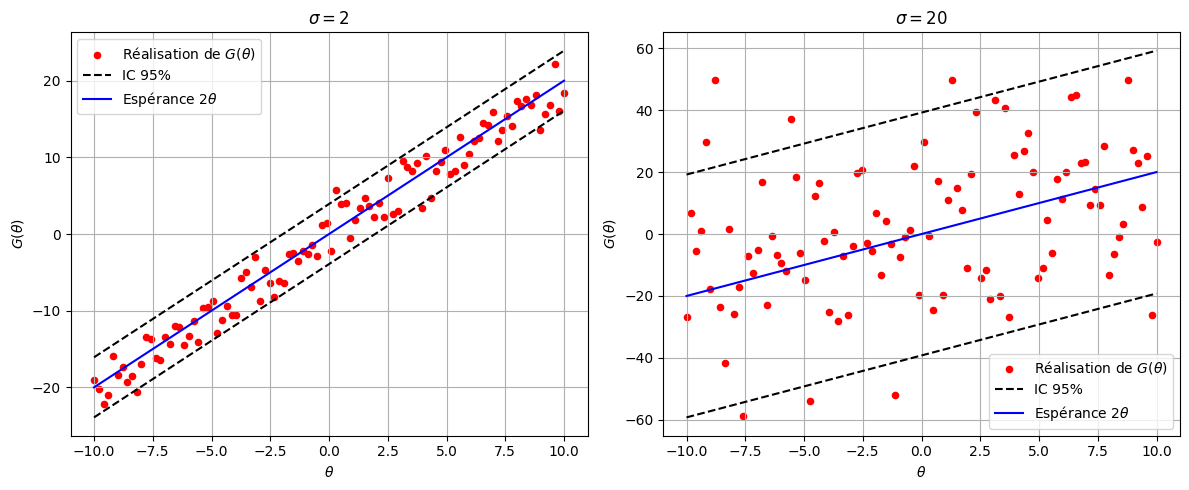

In [63]:
import numpy as np
import matplotlib.pyplot as plt

def G(theta, sigma):
    return 2 * theta + np.random.normal(0, sigma)

Theta = np.linspace(-10, 10, 100)

sigmas = [2, 20]  # sigma petit et sigma grand
titles = [r'$\sigma = 2$', r'$\sigma = 20$']

plt.figure(figsize=(12, 5))

for i, sigma in enumerate(sigmas):
    Y = np.array([G(t, sigma) for t in Theta])

    borne_inf = 2 * Theta - 1.96 * sigma
    borne_sup = 2 * Theta + 1.96 * sigma

    plt.subplot(1, 2, i + 1)

    plt.scatter(Theta, Y, color='red', s=20, label='Réalisation de $G(\\theta)$')
    plt.plot(Theta, borne_inf, 'k--', label='IC 95%')
    plt.plot(Theta, borne_sup, 'k--')
    plt.plot(Theta, 2 * Theta, color='blue', label='Espérance $2\\theta$')

    plt.title(titles[i])
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$G(\theta)$')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


Pour coller aux conditions de Gibbs-Monro, il faut bounded mean and variance. pour la mean c'est ok même si la fonction n'est pas borné on va se mettre dans un espace de recherche borné. 2ème condition on est bien dans le cas :  g(.) below then above threshold 0. g(.) strictly increasing near θ⋆ = E[X]. et ici  |g(θ)−α| not too small far from θ⋆ est très bien respecté.

Sur les 2 graphes représenté ont voit que plus sigma augmente plus la recherche devient compliqué et on pourrait avoir du ping pong. 
Avant de tester différents algorithmes

Donner les candidats les meilleures en fonction de la loi



La comparaison de la performance se fait avec la moyenne empirique de votre échantillon par rapport à la solution trouvé. peut on pensé à d'autres estimteurs de la moyenne ? 

# Algorithme testé

On va testé 3 algorithmes :
- Robins-Monro
- ADAM
- ADAGRAD

Sur différentes lois de probabilités.

## Gradient bruité et Robbins–Monro

On a programmé la fonction $G$ et on s’apprête à programmer l’algorithme de Robbins–Monro :
$$
\Theta_{n+1} = \Theta_n - a_n\, G(\Theta_n).
$$
On prendra des pas de la forme
$$
a_n = \frac{a}{n^\alpha},
$$
où $a > 0$ et $\alpha \in (0,1]$ sont des paramètres de l’algorithme.

---

## AdaGrad

L’algorithme **AdaGrad** adapte le pas de descente en fonction de l’historique des gradients observés.  
On introduit la suite
$$
S_n = \sum_{k=1}^n G(\Theta_k)^2.
$$
La mise à jour de $\Theta_n$ est donnée par
$$
\Theta_{n+1}
= \Theta_n
- \frac{a}{\sqrt{S_n} + \varepsilon}\, G(\Theta_n),
$$
où $a > 0$ est le pas initial et $\varepsilon > 0$ est un paramètre de stabilisation numérique.

---

## Adam

L’algorithme **Adam** combine une moyenne exponentielle des gradients (moment d’ordre 1) et une moyenne exponentielle des gradients au carré (moment d’ordre 2).

On définit les suites :
$$
\begin{aligned}
m_n &= \beta_1 m_{n-1} + (1-\beta_1)\, G(\Theta_n), \\
v_n &= \beta_2 v_{n-1} + (1-\beta_2)\, G(\Theta_n)^2,
\end{aligned}
$$
avec $m_0 = 0$, $v_0 = 0$ et $\beta_1, \beta_2 \in (0,1)$.

Les versions corrigées du biais sont données par :
$$
\begin{aligned}
\hat m_n &= \frac{m_n}{1-\beta_1^n}, \\
\hat v_n &= \frac{v_n}{1-\beta_2^n}.
\end{aligned}
$$

La mise à jour de $\Theta_n$ est alors :
$$
\Theta_{n+1}
= \Theta_n
- a\, \frac{\hat m_n}{\sqrt{\hat v_n} + \varepsilon},
$$
où $a > 0$ est le pas d’apprentissage et $\varepsilon > 0$ un terme de régularisation numérique.


# Loi normal

On prend X un vecteur gaussien de dimension d

In [ ]:
d = 10
sigma = np.linspace(1, 10, d)
mu = np.linspace(-5, 5, d)

def G(theta, mu, sigma):
    """Génère le gradient stochastique vectoriel"""
    epsilon = np.random.normal(loc=mu, scale=sigma, size=d)
    return 2 * (theta - epsilon)


On prend $\theta_{init}$ dans [-10 , 10]^d 
les $\mu_{i}$ sont dans [-5, 5] avec les $\sigma_{i}$ dans [1, 5] 

On fixe N = 100 le nombre d'itération de l'algorithme de Robins-Monro et à 50 le nombre d'observations du vecteur aléatoire X. 


Dans un premier temps on teste Robins-Monro avec des variables aléatoires i.i.d de variance croissante tel que (i < j) |-> $\sigma_{i}$ < $\sigma_{j}$ pour voir si l'algorithme a plus de mal avec les lois qui ont une plus forte variance


In [ ]:

def RobbinsMonro(thetainit, a, alpha, mu, sigma, nmax=100):
    """Algorithme de Robbins-Monro pour vecteurs en dimension d"""
    Theta = np.zeros((nmax, d))  # matrice nmplt x d
    Theta[0] = thetainit
    for n in range(nmax - 1):
        Theta[n + 1] = Theta[n] - a / (n + 1)**alpha * G(Theta[n], mu, sigma)
    
    return Theta

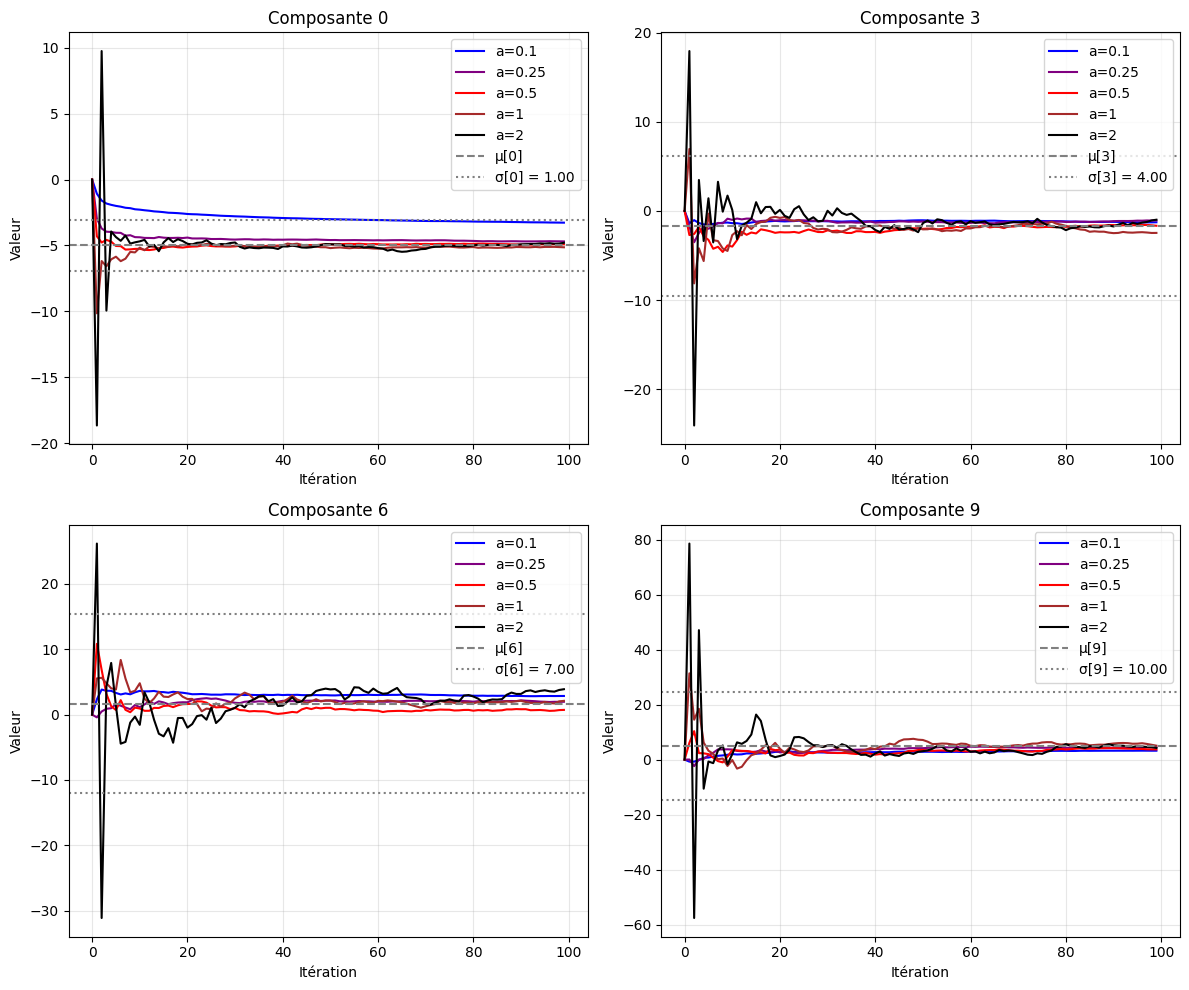

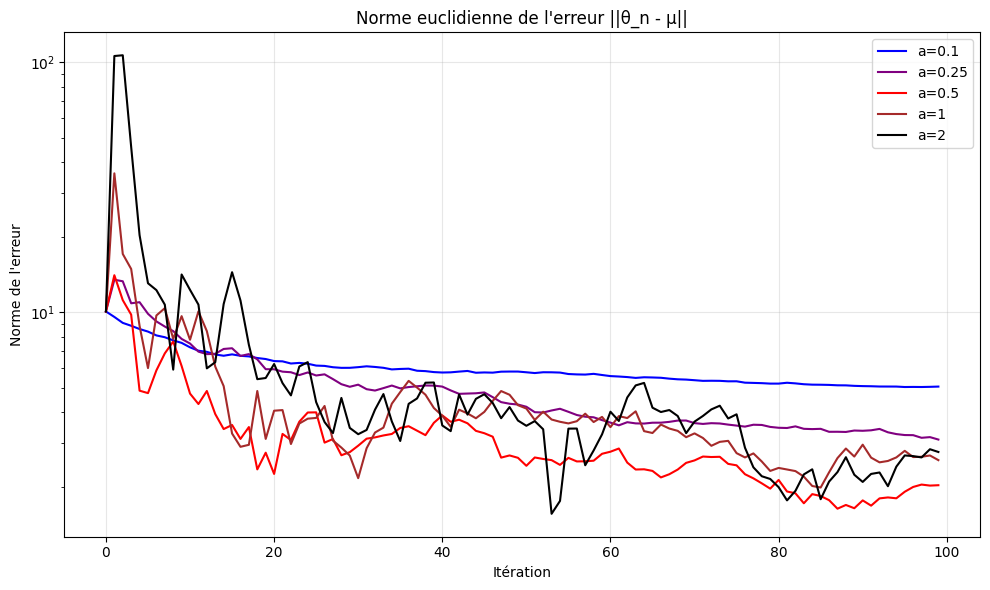

Erreur finale (norme) pour chaque valeur de a:
a=0.1  : 5.0533
a=0.25 : 3.1024
a=0.5  : 2.0373
a=1    : 2.5666
a=2    : 2.7667


In [ ]:

thetainit = np.zeros(d) # pour la reproductibilité

Theta1 = RobbinsMonro(thetainit, 0.1, alpha=1, mu=mu, sigma=sigma)
Theta2 = RobbinsMonro(thetainit, 0.25, alpha=1, mu=mu, sigma=sigma)
Theta3 = RobbinsMonro(thetainit, 0.5, alpha=1, mu=mu, sigma=sigma)
Theta4 = RobbinsMonro(thetainit, 1, alpha=1, mu=mu, sigma=sigma)
Theta5 = RobbinsMonro(thetainit, 2, alpha=1, mu=mu, sigma=sigma)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
components_to_plot = [0, 3, 6, 9]  

for idx, comp in enumerate(components_to_plot):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(Theta1[:, comp], color='blue', label='a=0.1')
    ax.plot(Theta2[:, comp], color='purple', label='a=0.25')
    ax.plot(Theta3[:, comp], color='red', label='a=0.5')
    ax.plot(Theta4[:, comp], color='brown', label='a=1')
    ax.plot(Theta5[:, comp], color='black', label='a=2')
    ax.axhline(mu[comp], color='gray', linestyle='--', label=f'μ[{comp}]')
    ax.axhline(mu[comp] + 1.96 * sigma[comp], color='gray', linestyle=':', label=f'σ[{comp}] = {sigma[comp]:.2f}')
    ax.axhline(mu[comp] - 1.96 * sigma[comp], color='gray', linestyle=':')
    ax.set_title(f'Composante {comp}')
    ax.set_xlabel('Itération')
    ax.set_ylabel('Valeur')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualisation de la norme de l'erreur
fig, ax = plt.subplots(figsize=(10, 6))

error1 = np.linalg.norm(Theta1 - mu, axis=1)
error2 = np.linalg.norm(Theta2 - mu, axis=1)
error3 = np.linalg.norm(Theta3 - mu, axis=1)
error4 = np.linalg.norm(Theta4 - mu, axis=1)
error5 = np.linalg.norm(Theta5 - mu, axis=1)

ax.plot(error1, color='blue', label='a=0.1')
ax.plot(error2, color='purple', label='a=0.25')
ax.plot(error3, color='red', label='a=0.5')
ax.plot(error4, color='brown', label='a=1')
ax.plot(error5, color='black', label='a=2')

ax.set_title('Norme euclidienne de l\'erreur ||θ_n - μ||')
ax.set_xlabel('Itération')
ax.set_ylabel('Norme de l\'erreur')
ax.set_yscale('log')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Erreur finale (norme) pour chaque valeur de a:")
print(f"a=0.1  : {error1[-1]:.4f}")
print(f"a=0.25 : {error2[-1]:.4f}")
print(f"a=0.5  : {error3[-1]:.4f}")
print(f"a=1    : {error4[-1]:.4f}")
print(f"a=2    : {error5[-1]:.4f}")

On obtient les meilleurs résultats pour un pas de 0.5 et malgré le fait que les composantes 6 et 9 ont des termes qui suivent des lois avec une variance plus importante, l'algorithme de Robins-Monro est assez performant.On obtient une erreur par rapport à la moyenne empirique autour de 1.9.

In [66]:
def SeveralRobbinsMonro(thetainit, a, alpha, mu, sigma, nmax=50, nsimu=100):
    """
    Répète l'algorithme nsimu fois et collecte les valeurs finales.
    Retourne une matrice (nsimu, d) des positions finales.
    """
    Result = np.zeros((nsimu, d))
    for i in range(nsimu):
        Theta = RobbinsMonro(thetainit, a, alpha, mu, sigma, nmax)
        Result[i] = Theta[-1] 
    return Result

def RobbinsMonroForVaryingStepSize(thetainit, Steps, alpha, mu, sigma, nmax=50, nsimu=100):
    """
    Analyse le compromis biais-variance pour différentes valeurs du pas.
    
    Returns:
        Bias_squared: Biais au carré moyen sur toutes les composantes
        Variance: Variance moyenne sur toutes les composantes
        MSE: Mean Squared Error (Bias² + Variance)
    """
    nbSteps = len(Steps)
    Bias_squared = np.zeros(nbSteps)
    Variance = np.zeros(nbSteps)
    
    for i in range(nbSteps):
        Results = SeveralRobbinsMonro(thetainit, Steps[i], alpha, mu, sigma, nmax, nsimu)
        
        empirical_mean = np.mean(Results, axis=0) 
        
        bias_vector = empirical_mean - mu
        Bias_squared[i] = np.mean(bias_vector ** 2)  
        
        Variance[i] = np.mean(np.var(Results, axis=0))
    
    MSE = Bias_squared + Variance
    return Bias_squared, Variance, MSE

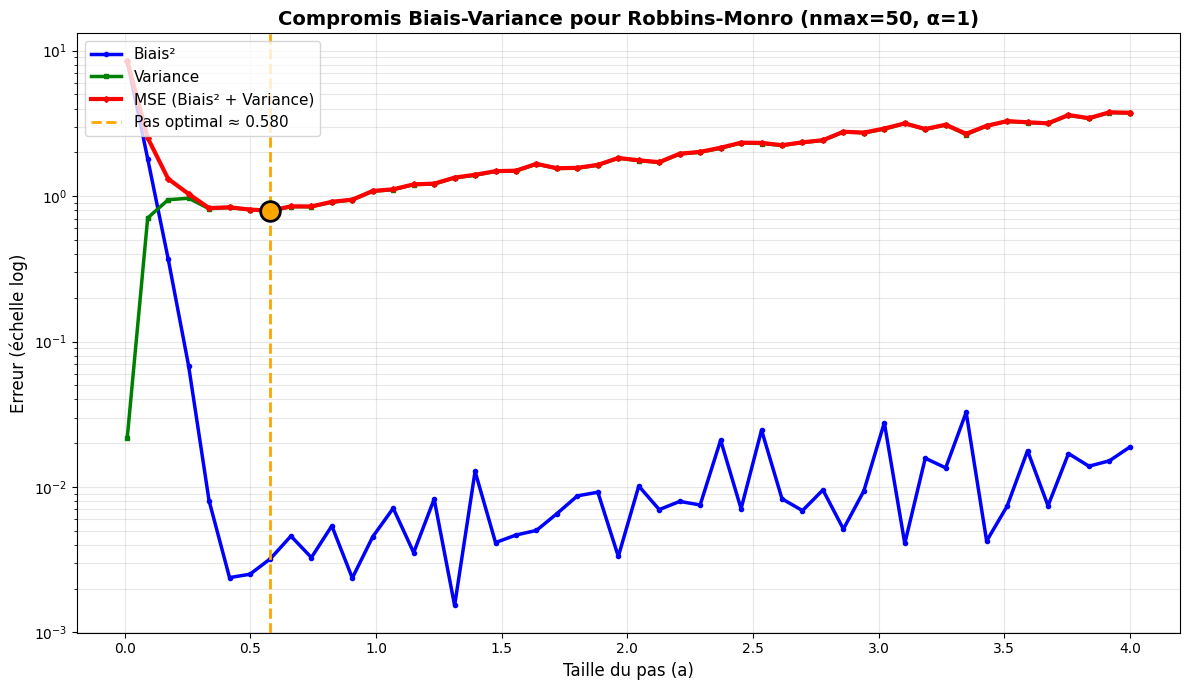

In [67]:

thetainit_bv = np.zeros(d)  # pour la reproductibilité

Steps = np.linspace(0.01, 4, 50)  # 50 valeurs de pas à tester
Bias_squared, Variance, MSE = RobbinsMonroForVaryingStepSize(
    thetainit=thetainit_bv, 
    Steps=Steps, 
    alpha=1, 
    mu=mu, 
    sigma=sigma,
    nmax=50, 
    nsimu=200  # 200 simulations par pas
)

# Trouver le pas optimal (MSE minimal)
optimal_idx = np.argmin(MSE)
optimal_step = Steps[optimal_idx]

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(Steps, Bias_squared, color='blue', label='Biais²', linewidth=2.5, marker='o', markersize=3)
ax.plot(Steps, Variance, color='green', label='Variance', linewidth=2.5, marker='s', markersize=3)
ax.plot(Steps, MSE, color='red', label='MSE (Biais² + Variance)', linewidth=3, marker='D', markersize=3)

# Marquer le pas optimal
ax.axvline(optimal_step, color='orange', linestyle='--', linewidth=2, 
           label=f'Pas optimal ≈ {optimal_step:.3f}')
ax.scatter([optimal_step], [MSE[optimal_idx]], color='orange', s=200, zorder=5, 
           edgecolors='black', linewidths=2)

ax.set_yscale('log')
ax.set_xlabel('Taille du pas (a)', fontsize=12)
ax.set_ylabel('Erreur (échelle log)', fontsize=12)
ax.set_title('Compromis Biais-Variance pour Robbins-Monro (nmax=50, α=1)', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

# Loi de student 

La densité de probabilité de la loi de student dans les queues de distributions est plus élevé par rapport à la loi normal. La diminution du pas dans Robins-Monro  devra donc être plus rapide pour éviter qu'une perturbation dû à la loi ne fasse divergé l'algorithme de la solution. 

ADAGRAD adapte son pas en fonction de la moyenne de la norme des gradients précédents. Le fait qu'il y ait beaucoup d'outliers va entraîner un nombre plus important de gradient avec une norme importante ce qui peut ralentir fortement la vitesse de convergence. On pense à priori que ce n'est pas l'optimal.

Adam on pense qu'il va être fort parce qu'il a un terme de momentum donc même si la loi de student donne en moyenne plus de points loin de la moyenne qu'une loi normal celui-ci en sera moins sensible. Il faut donc surpondérer les coefficients de momentum $\beta_{1}$ et $\beta_{2}$ plus grand. 

# Loi de Student (version CHAT)

La loi de Student possède des queues de distribution plus épaisses que la loi normale. En conséquence, la probabilité d’observer des réalisations de grande amplitude est plus élevée. Dans le cadre de l’algorithme de Robbins–Monro, cela implique que le pas d’apprentissage doit décroître suffisamment rapidement afin d’éviter qu’une perturbation exceptionnelle ne provoque une divergence de l’algorithme ou une instabilité autour de la solution.

L’algorithme **AdaGrad** adapte son pas de descente en fonction de la somme des normes des gradients observés au cours des itérations précédentes. La présence fréquente d’outliers, caractéristique de la loi de Student, conduit à des gradients de grande norme qui s’accumulent dans le terme de normalisation. Cela entraîne une diminution rapide du pas effectif, pouvant ralentir significativement la convergence de l’algorithme. On peut donc s’attendre à ce qu’AdaGrad ne soit pas optimal dans ce contexte.

L’algorithme **Adam** semble plus adapté à ce type de bruit. En effet, l’introduction de termes de momentum permet de lisser les fluctuations dues aux gradients aberrants. Même si la loi de Student génère en moyenne davantage de points éloignés de la moyenne qu’une loi normale, Adam y est moins sensible grâce aux moyennes exponentielles des gradients et des gradients au carré. Il peut alors être pertinent de choisir des coefficients de momentum élevés, c’est-à-dire des valeurs de $\beta_1$ et $\beta_2$ proches de 1, afin d’accentuer cet effet de lissage.


In [ ]:
def G_student_scipy(theta, mu, sigma, df=5):
    d = len(mu)
    epsilon = np.zeros(d)
    
    for i in range(d):
        # Génère t_i ~ t(df, loc=mu_i, scale=sigma_i)
        epsilon[i] = stats.t.rvs(df=df, loc=mu[i], scale=sigma[i])
    
    return 2 * (theta - epsilon)

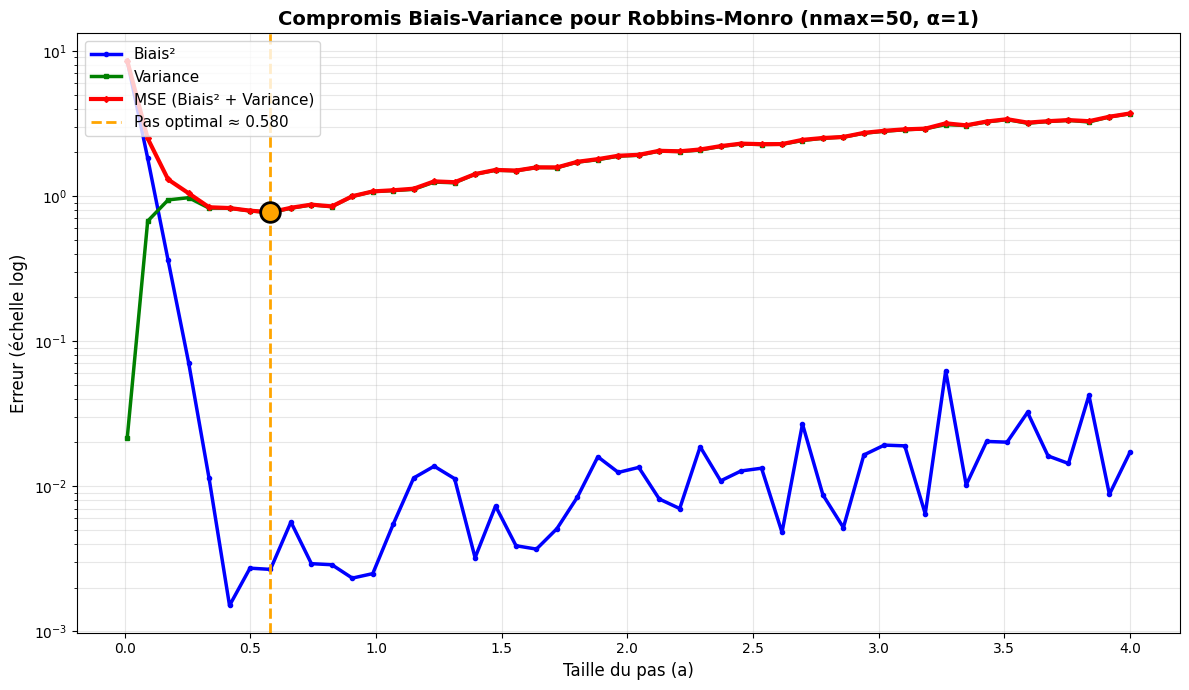

In [74]:

thetainit_bv = np.zeros(d)  # pour la reproductibilité

Steps = np.linspace(0.01, 4, 50)  # 50 valeurs de pas à tester
Bias_squared, Variance, MSE = RobbinsMonroForVaryingStepSize(
    thetainit=thetainit_bv, 
    Steps=Steps, 
    alpha=1, 
    mu=mu, 
    sigma=sigma,
    nmax=50, 
    nsimu=200  # 200 simulations par pas
)

# Trouver le pas optimal (MSE minimal)
optimal_idx = np.argmin(MSE)
optimal_step = Steps[optimal_idx]

fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(Steps, Bias_squared, color='blue', label='Biais²', linewidth=2.5, marker='o', markersize=3)
ax.plot(Steps, Variance, color='green', label='Variance', linewidth=2.5, marker='s', markersize=3)
ax.plot(Steps, MSE, color='red', label='MSE (Biais² + Variance)', linewidth=3, marker='D', markersize=3)

# Marquer le pas optimal
ax.axvline(optimal_step, color='orange', linestyle='--', linewidth=2, 
           label=f'Pas optimal ≈ {optimal_step:.3f}')
ax.scatter([optimal_step], [MSE[optimal_idx]], color='orange', s=200, zorder=5, 
           edgecolors='black', linewidths=2)

ax.set_yscale('log')
ax.set_xlabel('Taille du pas (a)', fontsize=12)
ax.set_ylabel('Erreur (échelle log)', fontsize=12)
ax.set_title('Compromis Biais-Variance pour Robbins-Monro (nmax=50, α=1)', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()